In [1]:
import random
import time
import matplotlib.pyplot as plt
import copy
import sys

In [2]:
sys.setrecursionlimit(10000)

# Fonctions Utiles

Les deux fonctions données plus bas sont utiles pour tester si un tableau ou un ensemble de tableaux sont bien
triés par ordre ascendant.


In [3]:
def isSorted(l):
    for i in range(len(l) - 1):
        if l[i] > l[i + 1]: return False
    return True

def areSorted(ll):
    for i in range(len(ll)):
        if not isSorted(ll[i]): return (False, i)
    return (True, 0)

# Création des tableaux

La fonction __create\_data__ permet de créer des listes qui contiennent les tableaux à trier avec des tailles
croissantes. Les paramètres par défaut sont 15 tableaux, et des tailles de tableaux qui augmentent  par incrément de 200. Par défaut, le plus petit tableau aura 200 éléments, le plus grand aura 3000 éléments.

In [4]:
def create_data(nlist=15, nval=200):
    
    # Création de listes de taille incrémentale et de contenu aléatoire
    listDataRandom = []
    listDataSorted = []
    listDataInversedSorted = []
    sizeArrays = []
    
    # Remplissage des listes
    for i in range(1, nlist + 1):
        s = nval * i 
        dataRandom = s*[0]
        dataSorted = s*[0]
        dataInversed = s*[0]
        for j in range(s):
            dataRandom[j]=j
            dataSorted[j]=j
            dataInversed[j]=j
            
        dataInversed.reverse()
        random.shuffle(dataRandom)
        
        listDataRandom.append(dataRandom)
        listDataSorted.append(dataSorted)
        listDataInversedSorted.append(dataInversed)
        sizeArrays.append(s)

    return(sizeArrays, listDataRandom, listDataSorted, listDataInversedSorted)


# Tri des tableaux

La fonction **executerTri** prend en entrée :

- la fonction qui va effectuer le tri **fct_tri**
- la couleur des tracés **color**
- le nom de l'algorithme de tri **nom**
- le nombre de tableaux **nlist** (utilisé par **create_data**)
- le nombre de valeurs dans le premier tableau **nval**  (utilisé par **create_data**)
- un booléen qui indique si le tableau est trié **surplace** ou si le tableau trié est renvoyé comme résultat de la fonction de tri



In [5]:
def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace = True):
    
    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)
    
    toplotRandom = []
    toplotSorted = []
    toplotInverted = []
    
    dataTestRandom    = copy.deepcopy(listDataRandom)
    dataTestSorted    = copy.deepcopy(listDataSorted)
    dataTestInverted  = copy.deepcopy(listDataInvertedSorted)
    
    for i in range(len(axis)):
        time1 = time.time()
        if surplace:
            fct_tri(dataTestRandom[i])
        else:
            dataTestRandom[i] = fct_tri(dataTestRandom[i])
        time2 = time.time()
        toplotRandom.append(time2 - time1)
        time3 = time.time()
        if surplace:
            fct_tri(dataTestSorted[i])
        else:
            dataTestSorted[i] = fct_tri(dataTestSorted[i])
        time4 = time.time()
        toplotSorted.append(time4 - time3)
        time5 = time.time()
        if surplace:
            fct_tri(dataTestInverted[i])
        else:
            dataTestInverted[i] = fct_tri(dataTestInverted[i])
        time6 = time.time()
        toplotInverted.append(time6 - time5)

    (ok1, ipb1) = areSorted(dataTestRandom)
    (ok2, ipb2) = areSorted(dataTestSorted)
    (ok3, ipb3) = areSorted(dataTestInverted)
    
    if not ok1:
        print(nom + ' data random incorrect, liste #' + str(ipb1))
    else:
        plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    if not ok2:
        print(nom + ' data Sorted incorrect, liste #' + str(ipb2))
    else:
        plt.plot(axis, toplotSorted, '--' + color, label=nom + ' (Sorted)')

    if not ok3:
        print(nom + ' data Inverted incorrect, liste #' + str(ipb3))
    else:
        plt.plot(axis, toplotInverted, ':' + color, label=nom + ' (Inverted)')
        plt.legend()


# Algorithmes de tri

## Bubble sort

In [6]:
def bubble_sort(A):
    n = len(A)
    flag = 1
    for i in range(n-1):
        flag = 0
        for j in range(n-1-i):
            if A[j]>A[j+1]:            
                t = A[j]
                A[j]=A[j+1]
                A[j+1] = t
                flag = 1
        if flag == 0:
            break
    return A

## Insertion sort

In [7]:
def insertion_sort(A):
    for i in range(1, len(A)):
        key = A[i]
        j = i-1
        while key < A[j] and j>=0 :
            A[j+1] = A[j]
            j-=1
        A[j+1] = key
    return A

print(insertion_sort([10,14,6,392,0,1]))

[0, 1, 6, 10, 14, 392]


## Selection sort

In [8]:
def selection_sort(A):
    for i in range(len(A)):
        min_ind = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_ind]:
                min_ind = j
        temp = A[min_ind]
        A[min_ind] = A[i]
        A[i] = temp
        
    return A

print(selection_sort([10,14,6,392,0,1]))

[0, 1, 6, 10, 14, 392]


## Heap sort 
**Made by ChatGPT**

In [9]:
# Function to heapify a subtree rooted at index i
# n is the size of the heap
def heapify(arr, n, i):
    largest = i  # Initialize largest as root
    left = 2 * i + 1  # Left child
    right = 2 * i + 2  # Right child

    # If the left child exists and is greater than the root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # If the right child exists and is greater than the current largest
    if right < n and arr[right] > arr[largest]:
        largest = right

    # If the largest is not the root, swap and continue heapifying
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        # Heapify the affected subtree
        heapify(arr, n, largest)

# Main function to perform heap sort
def heap_sort(arr):
    n = len(arr)

    # Build a max heap by calling heapify for all non-leaf nodes
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extract elements one by one from the heap
    for i in range(n - 1, 0, -1):
        # Move the current root (largest) to the end
        arr[i], arr[0] = arr[0], arr[i]
        # Call heapify on the reduced heap
        heapify(arr, i, 0)

# Example usage:
arr = [10, 14, 6, 392, 0, 1]
heap_sort(arr)
print("Sorted array is:", arr)

Sorted array is: [0, 1, 6, 10, 14, 392]


## Quick sort (itératif)
**Made by ChatGPT**

In [11]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    
    stack = [(0, len(arr) - 1)]

    while stack:
        low, high = stack.pop()

        if low < high:
            pivot_index = partition(arr, low, high)
            
            # Push subarray indices to stack
            stack.append((low, pivot_index - 1))
            stack.append((pivot_index + 1, high))
    
    return arr

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

# Example usage
arr = [3, 6, 8, 10, 1, 2, 1]
sorted_arr = quick_sort(arr)
print(f"Sorted array: {sorted_arr}")

Sorted array: [1, 1, 2, 3, 6, 8, 10]


## Quick sort (récursif)
**Made by ChatGPT**

In [13]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Example usage
arr = [3, 6, 8, 10, 1, 2, 1]
sorted_arr = quick_sort(arr)
print(f"Sorted array: {sorted_arr}")

Sorted array: [1, 1, 2, 3, 6, 8, 10]


## Merge sort 
**Made by ChatGPT**

In [14]:
def merge_sort(arr):
    width = 1
    n = len(arr)
    # Iteratively merge subarrays
    while width < n:
        for i in range(0, n, 2 * width):
            left = i
            mid = min(i + width, n)
            right = min(i + 2 * width, n)
            merged = merge(arr[left:mid], arr[mid:right])
            arr[left:right] = merged
        width *= 2
    return arr

def merge(left, right):
    result = []
    i = j = 0
    # Merge two sorted subarrays
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Example usage
arr = [3, 6, 8, 10, 1, 2, 1]
sorted_arr = merge_sort(arr)
print(f"Sorted array: {sorted_arr}")

Sorted array: [1, 1, 2, 3, 6, 8, 10]


# Complexité empirique

le résultat de **executer_tri** avec l'algorithme **bubble_sort** est donné en exemple

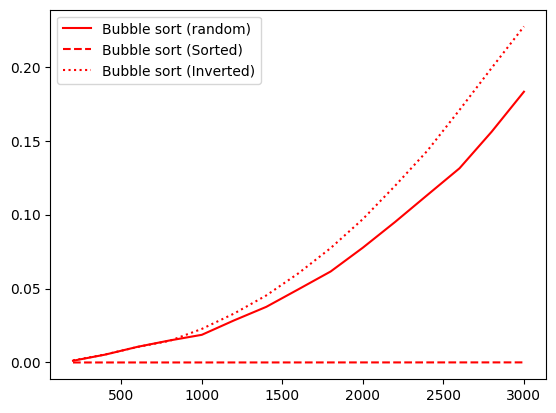

In [12]:
executerTri(bubble_sort,'r','Bubble sort')